## Black Scholes

There are two types of options, american and european. American options can be executed at anytime where european options can just be executed on exercise date. Black Scholes assumes european option, but it can be used for american options that don't pay dividends. Black Scholes states that the price of a call option depends on the cumulative normal distribution N of a function of the stock's price S, the present value of a risk-free bond trading at a value K which equals the strike price, the volatility of the stock's annualised returns and the time from today to the exercise date divided by the number of days in a financial year T.


$$C=S*N(d_1)- K*e^{-rT}N(d_2)$$

$$d_1=\frac{ln[S/PV(K)]}{\sigma\sqrt(T)}+\sigma \frac{\sqrt(T)}{2}$$

$$d_2=d_1-\sigma \sqrt(T)$$

### Get data

In [135]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from math import sqrt
import numpy as np
from scipy.stats import norm
import seaborn as sns, numpy as np
import math

In [29]:
cached_data={}
def stock_hist(symbol, start=None, end=None, cached_data=cached_data):
    if not symbol in cached_data:
        cached_data[symbol]=yf.download(symbol)
        print(F'Loaded {symbol} num values = {len(cached_data[symbol])}')
    return cached_data[symbol]

In [61]:
#tickers=['TSLA']
N = len(tickers)
historical = pd.concat((stock_hist(symbol)['Adj Close'] for symbol in tickers), axis=1).dropna(axis=0)

In [62]:
historical

,Adj Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2020-12-14,639.830017
2020-12-15,633.250000
2020-12-16,622.770020


In [63]:
historical = historical.dropna()
#Calculate return
historical = historical.assign(adjCloseDayBefore = historical['Adj Close'].shift(1))
historical['returns']=((historical['Adj Close']-historical['adjCloseDayBefore'])/historical['adjCloseDayBefore'])

In [31]:
tsla = yf.Ticker("tsla")

In [32]:
tsla_option = tsla.option_chain(tsla.options[0])

In [33]:
tsla_option.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TSLA201224C00020000,2020-12-18 20:39:31,20.0,618.79,0.05,0.00,12.849976,2.120668,12.0,7,0.000010,True,REGULAR,USD
1,TSLA201224C00040000,2020-12-10 16:33:24,40.0,579.95,0.00,0.00,0.000000,0.000000,2.0,4,0.000010,True,REGULAR,USD
2,TSLA201224C00060000,2020-12-17 20:58:21,60.0,596.25,0.00,0.00,0.000000,0.000000,2.0,4,0.000010,True,REGULAR,USD
3,TSLA201224C00080000,2020-12-17 20:58:21,80.0,576.17,0.00,0.00,0.000000,0.000000,NaN,3,0.000010,True,REGULAR,USD
4,TSLA201224C00100000,2020-12-14 18:54:14,100.0,536.90,0.00,0.00,536.900000,0.000000,NaN,1,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,TSLA201224C01100000,2020-12-18 20:59:39,1100.0,0.51,0.40,0.58,-1.490000,-74.500000,5881.0,2255,1.650392,False,REGULAR,USD
130,TSLA201224C01125000,2020-12-18 20:59:52,1125.0,0.43,0.37,0.43,-1.350000,-75.842690,1983.0,858,1.677736,False,REGULAR,USD
131,TSLA201224C01150000,2020-12-18 20:59:54,1150.0,0.32,0.32,0.33,-1.260000,-79.746830,4957.0,2963,1.701173,False,REGULAR,USD
132,TSLA201224C01155000,2020-12-18 20:58:42,1155.0,0.36,0.25,0.43,-1.150000,-76.158940,3353.0,1274,1.722658,False,REGULAR,USD


In [208]:
# Expiry date of option
exYear=2021
exMonth=1
exDay=22

In [102]:
timestamp=datetime.timestamp(datetime(exYear, exMonth, exDay,1,0,0,0))

In [203]:
# getting call option prices
r = pd.read_html(f"https://finance.yahoo.com/quote/TSLA/options?p=TSLA&date={int(timestamp)}")
rCall = r[0]
rPut = r[1]

### Black Scholes Formula

In [230]:
# S is the spot price 
# K is the strike price 
# T is the fraction of days to strike date divided by 252 (stock market days)
# r is the risk free rate
# sigma is the annual volatility of the returns of the stock 
def black_scholes(S, K, T, r, sigma):
    d1 = np.log(S/(K/(1 + r)**T)/(sigma*sqrt(T))) + (sigma*sqrt(T))/2
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - (K/(1 + r)**T) * norm.cdf(d2)

In [204]:
rCall

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,TSLA210122C00400000,2020-12-18 3:49PM EST,400.0,242.00,0.0,0.0,0.0,-,62,0,0.00%
1,TSLA210122C00410000,2020-12-17 12:47PM EST,410.0,243.22,0.0,0.0,0.0,-,-,0,0.00%
2,TSLA210122C00420000,2020-12-18 3:52PM EST,420.0,249.38,0.0,0.0,0.0,-,6,0,0.00%
3,TSLA210122C00430000,2020-12-18 1:02PM EST,430.0,249.64,0.0,0.0,0.0,-,6,0,0.00%
4,TSLA210122C00440000,2020-12-18 6:19PM EST,440.0,174.96,0.0,0.0,0.0,-,-,0,0.00%
...,...,...,...,...,...,...,...,...,...,...,...
78,TSLA210122C00800000,2020-12-18 3:59PM EST,800.0,14.80,0.0,0.0,0.0,-,657,0,12.50%
79,TSLA210122C00825000,2020-12-18 3:54PM EST,825.0,15.55,0.0,0.0,0.0,-,27,0,12.50%
80,TSLA210122C00850000,2020-12-18 3:58PM EST,850.0,11.22,0.0,0.0,0.0,-,68,0,12.50%
81,TSLA210122C00875000,2020-12-18 3:56PM EST,875.0,9.50,0.0,0.0,0.0,-,29,0,12.50%


In [209]:
latestSpotPrice = historical['Adj Close'][-1]
# Different Strike prices
numberOfStrikePrices = len(rCall['Strike'])
# define risk free rate
riskFreeRate=0.0069
#Calculate time from today to the exercise date  
today =datetime.now()
diff=(datetime(exYear,exMonth,exDay)-datetime(today.year, today.month, today.day)).days
print(f"Spot price: {latestSpotPrice}, Number of Strike Prices: {numberOfStrikePrices},risk free rate: {riskFreeRate}, time until expiration: {diff}")

Spot price: 695.0, Number of Strike Prices: 83,risk free rate: 0.0069, time until expiration: 32


In [231]:
# Calculate the volatility as the annualized standard deviation of the stock returns
sigma = np.sqrt(252) * historical['returns'].std()

list_estimates = []

# strike prices for call contracts 
for x in range(0,numberOfStrikePrices):
    value_s = black_scholes(S = latestSpotPrice, 
                            K = rCall['Strike'][x], 
                            T = (diff/252), 
                            r = riskFreeRate, 
                            sigma = sigma)
    list_estimates.append(value_s)
    

# merge the two lists to compare results
df_list = pd.DataFrame(data=list_estimates, index=rCall.index)
df_list['estimate_1'] = df_list[0]
del df_list[0]
df_estimate = rCall.merge(df_list, right_index = True, left_index = True)

In [232]:
df_estimate = df_estimate[:35]

In [227]:
df_estimate

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,estimate_1
0,TSLA210122C00400000,2020-12-18 3:49PM EST,400.0,242.00,0.0,0.0,0.0,-,62,0,0.00%,295.442187
1,TSLA210122C00410000,2020-12-17 12:47PM EST,410.0,243.22,0.0,0.0,0.0,-,-,0,0.00%,285.498630
2,TSLA210122C00420000,2020-12-18 3:52PM EST,420.0,249.38,0.0,0.0,0.0,-,6,0,0.00%,275.574791
3,TSLA210122C00430000,2020-12-18 1:02PM EST,430.0,249.64,0.0,0.0,0.0,-,6,0,0.00%,265.676826
4,TSLA210122C00440000,2020-12-18 6:19PM EST,440.0,174.96,0.0,0.0,0.0,-,-,0,0.00%,255.812136
5,TSLA210122C00450000,2020-12-18 3:37PM EST,450.0,202.10,0.0,0.0,0.0,-,4,0,0.00%,245.989432
6,TSLA210122C00460000,2020-12-18 1:02PM EST,460.0,221.97,0.0,0.0,0.0,-,8,0,0.00%,236.218771
7,TSLA210122C00470000,2020-12-18 1:03PM EST,470.0,213.05,0.0,0.0,0.0,-,5,0,0.00%,226.511548
8,TSLA210122C00480000,2020-12-18 3:18PM EST,480.0,192.00,0.0,0.0,0.0,-,2,0,0.00%,216.880438
9,TSLA210122C00490000,2020-12-18 3:37PM EST,490.0,167.10,0.0,0.0,0.0,-,12,0,0.00%,207.339302


In [233]:
# Calculate estimate error and plot result
df_estimate['estimate_error'] = ((df_estimate['Last Price'] - df_estimate['estimate_1'])/df_estimate['estimate_1'])*100

df_estimate['estimate_error'].describe()


count    35.000000
mean    -16.086816
std       8.874561
min     -33.196448
25%     -22.933495
50%     -17.357088
75%      -8.351860
max       0.488404
Name: estimate_error, dtype: float64

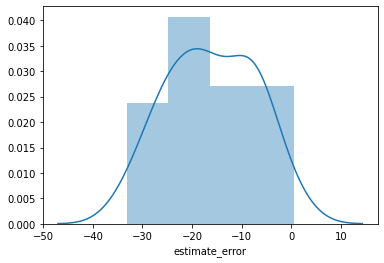

In [234]:
ax = sns.distplot(df_estimate['estimate_error'])

In [214]:
# only include contracts that have been traded at least once today
df1 = df_estimate[(df_estimate.Volume !='-')]

In [215]:
df1

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,estimate_1,estimate_error
0,TSLA210122C00400000,2020-12-18 3:49PM EST,400.0,242.00,0.0,0.0,0.0,-,62,0,0.00%,295.442187,-18.088881
2,TSLA210122C00420000,2020-12-18 3:52PM EST,420.0,249.38,0.0,0.0,0.0,-,6,0,0.00%,275.574791,-9.505511
3,TSLA210122C00430000,2020-12-18 1:02PM EST,430.0,249.64,0.0,0.0,0.0,-,6,0,0.00%,265.676826,-6.036216
5,TSLA210122C00450000,2020-12-18 3:37PM EST,450.0,202.10,0.0,0.0,0.0,-,4,0,0.00%,245.989432,-17.841999
6,TSLA210122C00460000,2020-12-18 1:02PM EST,460.0,221.97,0.0,0.0,0.0,-,8,0,0.00%,236.218771,-6.032023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,TSLA210122C00800000,2020-12-18 3:59PM EST,800.0,14.80,0.0,0.0,0.0,-,657,0,12.50%,21.457552,-31.026615
79,TSLA210122C00825000,2020-12-18 3:54PM EST,825.0,15.55,0.0,0.0,0.0,-,27,0,12.50%,16.677582,-6.761066
80,TSLA210122C00850000,2020-12-18 3:58PM EST,850.0,11.22,0.0,0.0,0.0,-,68,0,12.50%,12.856280,-12.727479
81,TSLA210122C00875000,2020-12-18 3:56PM EST,875.0,9.50,0.0,0.0,0.0,-,29,0,12.50%,9.834538,-3.401666


In [216]:
df1['estimate_error'].describe()

count    77.000000
mean    -19.124659
std       9.164518
min     -36.558431
25%     -26.357136
50%     -20.590938
75%     -11.360658
max      -0.956737
Name: estimate_error, dtype: float64

### Use mibian library and compare results

In [217]:
import mibian
# Calculate the volatility as the annualized standard deviation of the stock returns
sigma = np.sqrt(252) * historical['returns'].std()

list_estimates_mibian = []

# strike prices for call contracts 
for x in range(0,numberOfStrikePrices):
    c = mibian.BS([latestSpotPrice, rCall['Strike'][x], riskFreeRate, (diff/252)], volatility=sigma*100)
    list_estimates_mibian.append(c.callPrice)
    

# merge the two lists to compare results
df_list = pd.DataFrame(data=list_estimates_mibian, index=rCall.index)
df_list['estimate_mibian'] = df_list[0]
del df_list[0]
df_estimate_mibian = rCall.merge(df_list, right_index = True, left_index = True)

In [218]:
df_estimate_mibian

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,estimate_mibian
0,TSLA210122C00400000,2020-12-18 3:49PM EST,400.0,242.00,0.0,0.0,0.0,-,62,0,0.00%,2.950000e+02
1,TSLA210122C00410000,2020-12-17 12:47PM EST,410.0,243.22,0.0,0.0,0.0,-,-,0,0.00%,2.850000e+02
2,TSLA210122C00420000,2020-12-18 3:52PM EST,420.0,249.38,0.0,0.0,0.0,-,6,0,0.00%,2.750000e+02
3,TSLA210122C00430000,2020-12-18 1:02PM EST,430.0,249.64,0.0,0.0,0.0,-,6,0,0.00%,2.650000e+02
4,TSLA210122C00440000,2020-12-18 6:19PM EST,440.0,174.96,0.0,0.0,0.0,-,-,0,0.00%,2.550000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...
78,TSLA210122C00800000,2020-12-18 3:59PM EST,800.0,14.80,0.0,0.0,0.0,-,657,0,12.50%,2.111774e-41
79,TSLA210122C00825000,2020-12-18 3:54PM EST,825.0,15.55,0.0,0.0,0.0,-,27,0,12.50%,1.910494e-60
80,TSLA210122C00850000,2020-12-18 3:58PM EST,850.0,11.22,0.0,0.0,0.0,-,68,0,12.50%,1.885021e-82
81,TSLA210122C00875000,2020-12-18 3:56PM EST,875.0,9.50,0.0,0.0,0.0,-,29,0,12.50%,3.741612e-107


In [219]:
# only include contracts that have been traded at least once today
df_estimate_mibian = df_estimate_mibian[(df_estimate.Volume !='-')]

In [220]:
# Calculate estimate error and plot result
df_estimate_mibian['estimate_mibian_error'] = ((df_estimate_mibian['Last Price'] - df_estimate_mibian['estimate_mibian'])/df_estimate_mibian['estimate_mibian'])*100

D:\miniconda3\envs\UdacityEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [221]:
df_estimate_mibian

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,estimate_mibian,estimate_mibian_error
0,TSLA210122C00400000,2020-12-18 3:49PM EST,400.0,242.00,0.0,0.0,0.0,-,62,0,0.00%,2.950000e+02,-1.796610e+01
2,TSLA210122C00420000,2020-12-18 3:52PM EST,420.0,249.38,0.0,0.0,0.0,-,6,0,0.00%,2.750000e+02,-9.316367e+00
3,TSLA210122C00430000,2020-12-18 1:02PM EST,430.0,249.64,0.0,0.0,0.0,-,6,0,0.00%,2.650000e+02,-5.796230e+00
5,TSLA210122C00450000,2020-12-18 3:37PM EST,450.0,202.10,0.0,0.0,0.0,-,4,0,0.00%,2.450000e+02,-1.751021e+01
6,TSLA210122C00460000,2020-12-18 1:02PM EST,460.0,221.97,0.0,0.0,0.0,-,8,0,0.00%,2.350000e+02,-5.544685e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,TSLA210122C00800000,2020-12-18 3:59PM EST,800.0,14.80,0.0,0.0,0.0,-,657,0,12.50%,2.111774e-41,7.008327e+43
79,TSLA210122C00825000,2020-12-18 3:54PM EST,825.0,15.55,0.0,0.0,0.0,-,27,0,12.50%,1.910494e-60,8.139257e+62
80,TSLA210122C00850000,2020-12-18 3:58PM EST,850.0,11.22,0.0,0.0,0.0,-,68,0,12.50%,1.885021e-82,5.952189e+84
81,TSLA210122C00875000,2020-12-18 3:56PM EST,875.0,9.50,0.0,0.0,0.0,-,29,0,12.50%,3.741612e-107,2.539013e+109


In [222]:
df_estimate_mibian.describe()

,Strike,Last Price,Bid,Ask,Change,Open Interest,estimate_mibian,estimate_mibian_error
count,77.000000,77.000000,77.0,77.0,77.0,77.0,7.700000e+01,7.700000e+01
mean,616.428571,95.167143,0.0,0.0,0.0,0.0,9.520067e+01,3.147072e+134
std,105.553389,59.890410,0.0,0.0,0.0,0.0,7.819112e+01,2.761544e+135
min,400.000000,6.300000,0.0,0.0,0.0,0.0,2.599819e-134,-2.463751e+01
25%,550.000000,46.900000,0.0,0.0,0.0,0.0,2.000591e+01,-1.104547e+01
50%,605.000000,95.000000,0.0,0.0,0.0,0.0,9.000001e+01,3.439989e+00
75%,675.000000,123.800000,0.0,0.0,0.0,0.0,1.450000e+02,1.274327e+02
max,900.000000,249.640000,0.0,0.0,0.0,0.0,2.950000e+02,2.423245e+136
